# Q* Learning with Gym FrozenLake-v0 "8x8"

## Import the dependencies

* Numpy - a library of linear algebra
* Gym - a library of environments
* Random - a library which helps us to generate random numbers
* Matplotlib - a plotting library

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque

## Create our Agent

In [2]:
class Agent:
    
    def __init__(self, env):
        # Create the Q-table and initialize it with zeros
        self.qtable = np.zeros((env.observation_space.n, env.action_space.n))
        
        self.lr_interval = np.linspace(0.1, 0.8, 200001)
        
        self.gamma_start = 0.99
        self.gamma = self.gamma_start
        self.gamma_decay = 0.996
        
        self.epsilon = 1
        self.epsilon_decay = 0.9999
    
    def select_action(self, state):
        tradeoff = random.uniform(0, 1)
        
        if tradeoff > self.epsilon:
            action = np.argmax(self.qtable[state, :])
        else:
            action = env.action_space.sample()
            
        return action
    
    def fit(self, episode, action, state, new_state, reward, done):
        self.lr = self.lr_interval[episode]
        
        self.qtable[state, action] = self.qtable[state, action] + self.lr * (reward + 
               self.gamma * np.max(self.qtable[new_state, :]) - self.qtable[state, action])
        
        if done:
            self.epsilon *= self.epsilon_decay
            self.gamma = self.gamma_start
        else:
            self.gamma *= self.gamma_decay
            
            

In [3]:
def training(env, agent, number_episodes):
    
    rewards = deque(maxlen=100)
    best_avg_reward = -1
    avg_rewards = []
    
    for episode in range(number_episodes):
        state = env.reset()
        episode_reward = 0
        
        while True:
            action = agent.select_action(state)
            
            new_state, reward, done, _ = env.step(action)
            
            agent.fit(episode, action, state, new_state, reward, done)
            
            state = new_state
            episode_reward += reward
            
            if done:
                break
        
        rewards.append(episode_reward)
        
        if episode >= 99:
            avg_reward = np.mean(rewards)
            avg_rewards.append(avg_reward)
            
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
        
        if episode > 0 and episode % 20000 == 0:
            print("Best average reward is ", best_avg_reward)
            print("That means that {}% times we reached our goal".format(
                best_avg_reward * 100))
    
    return avg_rewards

## Create the FrozenLake environment

* env.action_space.n - number of actions, which provides our environment
* env.observation_space.n - number of states, which provides our environment

In [4]:
# is_slippery add some randomness to our algorithm
env = gym.make('FrozenLake-v0', map_name="8x8", is_slippery=True) 

In [5]:
action_size = env.action_space.n
state_size = env.observation_space.n

print("Action size =", action_size)
print("State size =", state_size)

Action size = 4
State size = 64


## Train the agent on the selected environment

In [6]:
agent = Agent(env)
avg_rewards = training(env, agent, 100001)

Best average reward is  0.22
That means that 22.0% times we reached our goal
Best average reward is  0.5
That means that 50.0% times we reached our goal
Best average reward is  0.58
That means that 57.99999999999999% times we reached our goal
Best average reward is  0.68
That means that 68.0% times we reached our goal
Best average reward is  0.68
That means that 68.0% times we reached our goal


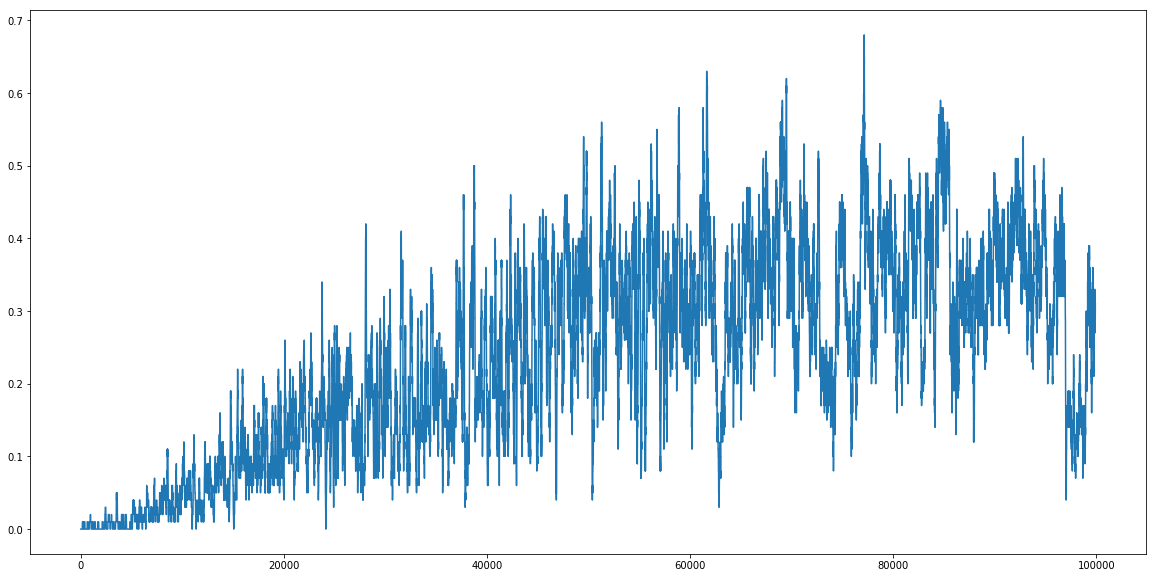

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(avg_rewards)
plt.show()